<a href="https://www.suzano.com.br/"><img src="https://investidorsardinha.r7.com/wp-content/uploads/2020/04/suzano-375x217.png" style="width:90px; float: left;"></a>

<a id='Inicio'> </a>

<h1 align='center'> Case Afrodev - SACOLÃO - Suzano </h1>
<br>
<center> 
Lucas Igor Balthazar<br>
Physicist, Data Scientist <br>
<a href = "mailto: lucasibalthazar@gmail.com">lucasibalthazar@gmail.com</a></center>

This notebook is a case study for the company [Suzano](https://www.suzano.com.br/). Whose objective is to test the <b><u>Predictive Data Modeling skills.</u></b>

<b>Objectives:</b>
> - The main objective is to build an analytical report that gives the company's management relevant insights into the sales of these products in these SACOLAO stores 

>
> - Predictive model that predicts with some significance the sales of each product at a certain point of sale.
>
> - A PowerPoint presentation containing the analysis

## Introduction<a id='Introduction'> </a>

Data engineers from the SACOLÃO supermarkets network collected sales data for 1559 different products in 10 stores located in different cities. Each store also has some unique attributes that are described below.

As a Data Analyst and aspiring Data Scientist at SACOLÃO, your goal is to build an analytical report that gives the company's board of directors relevant insights into the sales of these products in these SACOLÃO stores.

In addition, a predictive model that predicts with some significance the sales of each product at a given point of sale was requested.

Using this analytical report and this model, SACOLÃO's management will try to understand the properties of products and points of sale that play a fundamental role in increasing sales. Note that data may have missing values ​​as some stores may not have reported all data due to technical failures. Therefore, it will be necessary to treat them properly.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

*****
## Imports & Setup<a id='Imports_Setup'> </a>
This notebook has the following Python library dependencies:

In [2]:
import os                                           #all built-in operating system dependent modules
import sys                                          #provides access to some variables used or maintained by the interpreter
import pylab
import pandas as pd                                 #data processing csv, excel, files
import numpy as np                                  #scientific computing
import scipy.stats as stats

import seaborn as sns                               #data visualization library based on matplotlib
import matplotlib.pyplot as plt                     #graphical plots analysis

from sklearn.linear_model import LinearRegression   #linear regression
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.ensemble import RandomForestRegressor  #random forest regressor
from sklearn.preprocessing import OneHotEncoder     #feature engineering
from sklearn.preprocessing import LabelEncoder      #feature engineering
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error as MAE #Statistic mean absolute error metrics (MAE)
from sklearn.metrics import mean_squared_error as MSE  #Statistic mean squared error metrics (MSE)
from sklearn.metrics import r2_score as R2             #Statistic mean absolute error metrics
from sklearn.model_selection import cross_val_score as CVS     #Cross validation
from sklearn import metrics
from xgboost import XGBRegressor

from IPython.display import HTML
%matplotlib inline

Here, we describe the overview of used libraries:

- [Pandas](https://pandas.pydata.org/) is a Python library for a variety of data science applications. It is a powerful data analysis and manipulation tool. We will use it to open files, clean up and organize data.


- [Numpy](https://numpy.org/) is a package for scientific computing with Python for math applications.


- [Matplotlib](https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive views in Python.


- [Seaborn](https://seaborn.pydata.org/) is a matplotlib-based Python data visualization library. It provides a high-level interface for designing attractive and informative statistical graphs.


- [Sklearn](https://scikit-learn.org) is an open source machine learning library for the Python programming language. It has several classification, regression and grouping algorithms.

## Dataset Information

In [3]:
table_descr ={
'IDProduto':'ID exclusivo do produto',
'Peso':'Peso dos produtos',
'PerGordura':'Especifica se o produto tem baixo teor de gordura ou não',
'Visibilidade':'Porcentagem da área total de exibição de todos os produtos em uma loja alocada para o produto específico',
'TipoProduto':'Categoria à qual o produto pertence',
'PrecoMax':'Preço máximo de varejo (preço listado) dos produtos',
'IDLoja':'ID exclusivo da loja',
'AnoLoja':'Ano de criação dos pontos de venda',
'TamanhoLoja':'Tamanho da loja em termos de área coberta',
'LocalizacaoTipo':'Tipo de cidade em que a loja está localizada',
'TipoLoja':'Especifica se o ponto de venda é apenas uma mercearia ou algum tipo de supermercado',
'Vendas':'Vendas do produto na loja específica – Variável Target'
}

In [4]:
table = pd.DataFrame(table_descr, index=['Descrição']).T
table

,Descrição
IDProduto,ID exclusivo do produto
Peso,Peso dos produtos
PerGordura,Especifica se o produto tem baixo teor de gord...
Visibilidade,Porcentagem da área total de exibição de todos...
TipoProduto,Categoria à qual o produto pertence
PrecoMax,Preço máximo de varejo (preço listado) dos pro...
IDLoja,ID exclusivo da loja
AnoLoja,Ano de criação dos pontos de venda
TamanhoLoja,Tamanho da loja em termos de área coberta
LocalizacaoTipo,Tipo de cidade em que a loja está localizada


## Data Wrangling<a id='Data Wrangling'> </a>

<b> Data Wrangling</b> it is the process of transforming and mapping data from one form of "raw" data to another format with the intention of making it more appropriate and valuable for a variety of later purposes, such as analytics.

### Useful helper functions<a id='Useful helper functions'> </a>
Some useful helper functions to support data manipulation

In [5]:
def print_dtypes(df: pd.DataFrame)-> pd.DataFrame:
    '''Printing columns dtypes from database. 
    args.: df = pandas DataFrame'''
    
    return df.dtypes

def cardinality_check(df: pd.DataFrame)-> pd.DataFrame:
    '''Checking cardinality / distinct count for all columns dataframe. 
    args.: df = pandas DataFrame'''
    
    return df.apply(pd.Series.nunique)

def checking_NaN(df: pd.DataFrame)-> pd.DataFrame:
    '''Checking empty values'''
    empt = df.isnull().values.any()
    if empt:
        val = df.isnull().sum()
    else:
        val = 0
    return print(f'Dados faltantes: {empt}\nValores:\n{val}')

def non_numeric_array(df: pd.DataFrame)-> pd.DataFrame:
    '''Getting the non-numeric (categorical) values in df's'''
    array_not_num = [item for item in df.columns if df[item].dtypes == 'object']
    return array_not_num

def numeric_array(df: pd.DataFrame)-> pd.DataFrame:
    '''Getting the numeric (numeric) values in df's'''
    array_num = [item for item in df.columns if df[item].dtypes != 'object']
    return array_num

#### File paths

In [6]:
#File Path
def filepath(file_name:'xls') -> 'str':
    '''Add the file path'''
    if not (file_name.find('.xls') != -1): file_name = file_name+'.xls'
    script_dir = os.getcwd()
    rel_path = file_name       #File name
    abs_file_path = os.path.join(script_dir, rel_path)
    
    return abs_file_path

In [7]:
#Adding the system filepath
dados_teste = filepath('Dados_teste')
dados_treinamento = filepath('Dados_treino')

In [8]:
#Transform filepath to be readable by Pandas
dados_teste = dados_teste.replace("\\", "//")
dados_treinamento = dados_treinamento.replace("\\", "//")

Creation of the DataFrames that will be used in the analysis

In [9]:
df_teste = pd.read_excel(dados_teste, index_col=0)                 #Pandas Dataframe with test data
df_treinamento = pd.read_excel(dados_treinamento, index_col=0)     #Pandas Dataframe with treinament data

## Data Analysis

### Data cleaning

Now let's perform some data cleansing steps using a reference:

https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d 

In [10]:
df_teste.head()

,IDProduto,Peso,PerGordura,Visibilidade,TipoProduto,PrecoMax,IDLoja,AnoLoja,TamanhoLoja,LocalizacaoTipo,TipoLoja
0,1362J,311.250,Baixo,0.756484,snacks,107.8622,L1,2009,medio_porte,Sudeste,Atacado
1,1537C,124.500,normal,3.842768,lacteo,87.3198,L7,2017,NaN,Sul,Atacado
2,181Y,219.000,Baixo,9.957491,outros,241.7538,L3,2008,NaN,Norte,MercadoBairro
3,1436F,109.725,Baixo,1.538839,snacks,155.0340,L7,2017,NaN,Sul,Atacado
4,236B,NaN,Normal,11.859931,lacteo,234.2300,L5,1995,medio_porte,Norte,Premium


In [11]:
df_treinamento.head()

,IDProduto,Peso,PerGordura,Visibilidade,TipoProduto,PrecoMax,IDLoja,AnoLoja,TamanhoLoja,LocalizacaoTipo,TipoLoja,Vendas
0,1A,139.50,Baixo,1.604730,lacteo,249.8092,L1,2009,medio_porte,Sudeste,Atacado,5602.7070
1,2B,88.80,Normal,1.927822,refrigerante,48.2692,L2,2019,medio_porte,Norte,Varejo,665.1342
2,3C,262.50,Baixo,1.676007,carnes,141.6180,L1,2009,medio_porte,Sudeste,Atacado,3145.9050
3,4D,288.00,Normal,0.000000,frutas_e_legumes,182.0950,L3,2008,NaN,Norte,MercadoBairro,1098.5700
4,5E,133.95,Baixo,0.000000,casa,53.8614,L4,1997,grande,Norte,Atacado,1492.0578


Checking columns in the Dataframes

In [12]:
print(df_teste.columns)
print(df_treinamento.columns)

Index(['IDProduto', 'Peso', 'PerGordura', 'Visibilidade', 'TipoProduto',
       'PrecoMax', 'IDLoja', 'AnoLoja', 'TamanhoLoja', 'LocalizacaoTipo',
       'TipoLoja'],
      dtype='object')
Index(['IDProduto', 'Peso', 'PerGordura', 'Visibilidade', 'TipoProduto',
       'PrecoMax', 'IDLoja', 'AnoLoja', 'TamanhoLoja', 'LocalizacaoTipo',
       'TipoLoja', 'Vendas'],
      dtype='object')


<b>Partial Conclusion: </b>

We verify that the columns of both dataframes are the same, except for the `Sales` column in the training dataset.

#### <b>Checking the size of Dataset</b>

In [13]:
print(f'df_test: {df_teste.shape}\ndf_treinamento: {df_treinamento.shape}')

df_test: (5681, 11)
df_treinamento: (8523, 12)


#### <b>Verifying the information on dtypes, non-null count and cardinality</b>

In [14]:
#Verifying info, and cardinality in the df_teste
df_teste.info()
print('-'*40)
cardinality_check(df_teste)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 0 to 5680
Data columns (total 11 columns):
IDProduto          5681 non-null object
Peso               4705 non-null float64
PerGordura         5681 non-null object
Visibilidade       5681 non-null float64
TipoProduto        5681 non-null object
PrecoMax           5681 non-null float64
IDLoja             5681 non-null object
AnoLoja            5681 non-null int64
TamanhoLoja        4075 non-null object
LocalizacaoTipo    5681 non-null object
TipoLoja           5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 532.6+ KB
----------------------------------------


IDProduto          1543
Peso                410
PerGordura            5
Visibilidade       5277
TipoProduto          16
PrecoMax           4402
IDLoja               10
AnoLoja               9
TamanhoLoja           3
LocalizacaoTipo       3
TipoLoja              4
dtype: int64

In [15]:
#Verifying info, and cardinality in the df_treinamento
df_treinamento.info()
print('-'*40)
cardinality_check(df_treinamento)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
IDProduto          8523 non-null object
Peso               7060 non-null float64
PerGordura         8523 non-null object
Visibilidade       8523 non-null float64
TipoProduto        8523 non-null object
PrecoMax           8523 non-null float64
IDLoja             8523 non-null object
AnoLoja            8523 non-null int64
TamanhoLoja        6113 non-null object
LocalizacaoTipo    8523 non-null object
TipoLoja           8523 non-null object
Vendas             8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB
----------------------------------------


IDProduto          1559
Peso                415
PerGordura            5
Visibilidade       7880
TipoProduto          16
PrecoMax           5938
IDLoja               10
AnoLoja               9
TamanhoLoja           3
LocalizacaoTipo       3
TipoLoja              4
Vendas             3493
dtype: int64

#### Checking NaN values in the Dataframes

In [16]:
checking_NaN(df_teste)
print('-'*40)
checking_NaN(df_treinamento)

Dados faltantes: True
Valores:
IDProduto             0
Peso                976
PerGordura            0
Visibilidade          0
TipoProduto           0
PrecoMax              0
IDLoja                0
AnoLoja               0
TamanhoLoja        1606
LocalizacaoTipo       0
TipoLoja              0
dtype: int64
----------------------------------------
Dados faltantes: True
Valores:
IDProduto             0
Peso               1463
PerGordura            0
Visibilidade          0
TipoProduto           0
PrecoMax              0
IDLoja                0
AnoLoja               0
TamanhoLoja        2410
LocalizacaoTipo       0
TipoLoja              0
Vendas                0
dtype: int64


#### Checking NaN values proportion

In [17]:
#Missing data proportion (%)
def proportion_missing(df):
    perc ={}
    for item in df.columns:
        if df[item].isnull().values.any():
            perc[item] = round((df[item].isnull().sum()/df.shape[0])*100,3)
    return perc

print(proportion_missing(df_treinamento))
print(proportion_missing(df_teste))

{'Peso': 17.165, 'TamanhoLoja': 28.276}
{'Peso': 17.18, 'TamanhoLoja': 28.27}


Check the count of missing values for `Weight` and `Size Store`:

In [18]:
print(f'Peso:\n{df_treinamento.Peso.value_counts()}\n\n')
print(f'TamanhoLoja:\n{df_treinamento.TamanhoLoja.value_counts()}')

Peso:
182.250    86
264.000    82
204.750    77
177.000    76
139.500    68
           ..
132.000     2
115.275     1
141.300     1
81.000      1
97.800      1
Name: Peso, Length: 415, dtype: int64


TamanhoLoja:
medio_porte    2793
pequena        2388
grande          932
Name: TamanhoLoja, dtype: int64


<b>Partial Conclusion:</b>

In both dataframes, only the `Weight` and `Store Size` columns have missing data and can be handled.

#### <b>Checking a heat map for NaN positions in the Dataframe</b>

The application of the heat map helps to verify the positions and to know if the missing data distribution is regular or concentrated throughout the entire database.

Heat map for <b>df_teste</b>

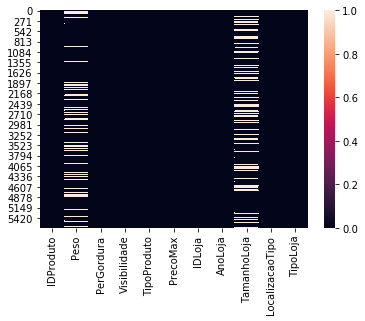

In [19]:
sns.heatmap(df_teste.isna())

Heat map for <b>df_treinamento</b>

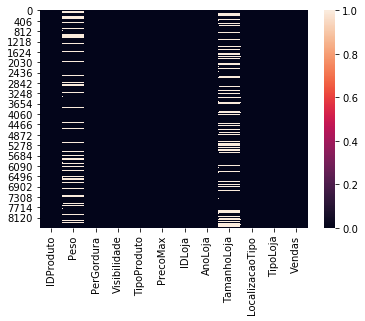

In [20]:
sns.heatmap(df_treinamento.isna())

#### Fill NaN values

For numeric values, we fill in missing data with the column median. For categorical data, we fill it with <b>modal value</b>. For this analysis, filling in the missing data from the numeric column with the median value does not differ much from the mean value. For this case, we adopt the median.

In [21]:
#Fill in empty values with  column mean (if numeric) and with zero (if non-numeric)
def fill_NaN(df):
    for item in df.columns:
        if (df[str(item)].dtypes == int) or ((df[str(item)].dtypes == float)) and (df[str(item)].isnull().values.any()):
            df[str(item)].fillna((df[str(item)].median()), inplace=True)
        elif (df[str(item)].dtypes == object) and (df[str(item)].isnull().values.any()):
            df[str(item)].fillna(df[str(item)].dropna().mode().values[0], inplace=True)

In [22]:
df_teste_not_null = df_teste.copy()
fill_NaN(df_teste_not_null)

df_train_not_null = df_treinamento.copy()
fill_NaN(df_train_not_null)

After manipulation, checking the new dataframe

In [23]:
checking_NaN(df_teste_not_null)
checking_NaN(df_train_not_null)

Dados faltantes: False
Valores:
0
Dados faltantes: False
Valores:
0


In [24]:
df_train_not_null.head()

,IDProduto,Peso,PerGordura,Visibilidade,TipoProduto,PrecoMax,IDLoja,AnoLoja,TamanhoLoja,LocalizacaoTipo,TipoLoja,Vendas
0,1A,139.50,Baixo,1.604730,lacteo,249.8092,L1,2009,medio_porte,Sudeste,Atacado,5602.7070
1,2B,88.80,Normal,1.927822,refrigerante,48.2692,L2,2019,medio_porte,Norte,Varejo,665.1342
2,3C,262.50,Baixo,1.676007,carnes,141.6180,L1,2009,medio_porte,Sudeste,Atacado,3145.9050
3,4D,288.00,Normal,0.000000,frutas_e_legumes,182.0950,L3,2008,medio_porte,Norte,MercadoBairro,1098.5700
4,5E,133.95,Baixo,0.000000,casa,53.8614,L4,1997,grande,Norte,Atacado,1492.0578


#### Verify category variable string type

Check the uniformity of writing categorical variables.

In [25]:
def verify_category_uniform(df):
    '''To analyse the uniform type in the categorical variables'''
    array_not_num = [item for item in df.columns if df[item].dtypes == 'object']
    cat_type = {}
    for item in array_not_num: cat_type[item] = df[item].unique()
    return cat_type

In [26]:
print(f'Variáveis categóricas n-padronizadas (df_teste):\n\n {verify_category_uniform(df_teste_not_null)}\n\nVariáveis categóricas n-padronizadas (df_treinamento):\n\n{verify_category_uniform(df_train_not_null)}')

Variáveis categóricas n-padronizadas (df_teste):

 {'IDProduto': array(['1362J', '1537C', '181Y', ..., '450H', '199Q', '784D'],
      dtype=object), 'PerGordura': array(['Baixo', 'normal', 'Normal', 'baixo', 'baixa gordura'],
      dtype=object), 'TipoProduto': array(['snacks', 'lacteo', 'outros', 'frutas_e_legumes', 'panificacao',
       'higiene pessoal', 'paes e bolos', 'alcoolicos', 'peixes',
       'refrigerante', 'casa', 'congelada', 'carnes',
       'produtos enlatados', 'cereais', 'cafe'], dtype=object), 'IDLoja': array(['L1', 'L7', 'L3', 'L5', 'L8', 'L2', 'L6', 'L10', 'L4', 'L9'],
      dtype=object), 'TamanhoLoja': array(['medio_porte', 'pequena', 'grande'], dtype=object), 'LocalizacaoTipo': array(['Sudeste', 'Sul', 'Norte'], dtype=object), 'TipoLoja': array(['Atacado', 'MercadoBairro', 'Premium', 'Varejo'], dtype=object)}

Variáveis categóricas n-padronizadas (df_treinamento):

{'IDProduto': array(['1A', '2B', '3C', ..., '1557W', '1558X', '1559Y'], dtype=object), 'PerGordura

After verifying the categorical value entries, we need to standardize them. We've seen that only the `PerGordura` variable requires standardization, so:

In [27]:
def normalize_categorical(df, col):
    df[col].replace(['baixo', 'normal', 'baixa gordura'], ['Baixo', 'Normal', 'Baixo'], inplace=True)

normalize_categorical(df_teste_not_null,'PerGordura')
normalize_categorical(df_train_not_null,'PerGordura')

Checking the categorical variables again:

In [28]:
print(f'Variáveis categóricas padronizadas (df_teste):\n\n {verify_category_uniform(df_teste_not_null)}\n\nVariáveis categóricas padronizadas (df_treinamento):\n\n{verify_category_uniform(df_train_not_null)}')

Variáveis categóricas padronizadas (df_teste):

 {'IDProduto': array(['1362J', '1537C', '181Y', ..., '450H', '199Q', '784D'],
      dtype=object), 'PerGordura': array(['Baixo', 'Normal'], dtype=object), 'TipoProduto': array(['snacks', 'lacteo', 'outros', 'frutas_e_legumes', 'panificacao',
       'higiene pessoal', 'paes e bolos', 'alcoolicos', 'peixes',
       'refrigerante', 'casa', 'congelada', 'carnes',
       'produtos enlatados', 'cereais', 'cafe'], dtype=object), 'IDLoja': array(['L1', 'L7', 'L3', 'L5', 'L8', 'L2', 'L6', 'L10', 'L4', 'L9'],
      dtype=object), 'TamanhoLoja': array(['medio_porte', 'pequena', 'grande'], dtype=object), 'LocalizacaoTipo': array(['Sudeste', 'Sul', 'Norte'], dtype=object), 'TipoLoja': array(['Atacado', 'MercadoBairro', 'Premium', 'Varejo'], dtype=object)}

Variáveis categóricas padronizadas (df_treinamento):

{'IDProduto': array(['1A', '2B', '3C', ..., '1557W', '1558X', '1559Y'], dtype=object), 'PerGordura': array(['Baixo', 'Normal'], dtype=object), '

#### Describe function to dataframes

In [29]:
df_teste_not_null.describe()

,Peso,Visibilidade,PrecoMax,AnoLoja
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,189.930351,6.568386,141.023273,2007.828903
std,63.687458,5.125237,61.809091,8.372256
min,68.325000,0.000000,31.990000,1995.000000
25%,137.925000,2.704688,94.412000,1997.000000
50%,187.500000,5.415425,141.415400,2009.000000
75%,237.750000,9.346262,186.026600,2014.000000
max,320.250000,32.363725,266.588400,2019.000000


In [30]:
#Find maximum and minimum values
#num = df_teste.select_dtypes('number').columns.to_list()
#min_values = pd.DataFrame()
#max_values = pd.DataFrame()
#for item in num:
#    max_values= max_values.append(df_teste[df_teste[item] == df_teste[item].max()])
#max_values

In [31]:
df_train_not_null.describe()

,Peso,Visibilidade,PrecoMax,AnoLoja,Vendas
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,192.201294,6.613203,140.992782,2007.831867,3271.933370
std,63.408606,5.159782,62.275067,8.371760,2559.749424
min,68.325000,0.000000,31.290000,1995.000000,49.935000
25%,139.650000,2.698948,93.826500,1997.000000,1251.371100
50%,189.000000,5.393093,143.012800,2009.000000,2691.496500
75%,240.000000,9.458529,185.643700,2014.000000,4651.944600
max,320.250000,32.839095,266.888400,2019.000000,19630.447200


#### Grouping values of dataframe data

In [32]:
#Agregando pot LocalizaçãoTipo, TipoLoja IDLoja
t_regiao_loja =  pd.pivot_table(df_train_not_null,index=['LocalizacaoTipo', "TipoLoja", "TamanhoLoja", "IDLoja"],
                                values=numeric_array(df_train_not_null),
                                aggfunc='mean')
t_regiao_loja.head(10)

AnoLoja        Peso  \
LocalizacaoTipo TipoLoja      TamanhoLoja IDLoja                        
Norte           Atacado       grande      L4         1997  195.092221   
                MercadoBairro medio_porte L3         2008  193.697297   
                Premium       medio_porte L5         1995  189.000000   
                Varejo        medio_porte L2         2019  193.100189   
Sudeste         Atacado       medio_porte L1         2009  193.761694   
                              pequena     L8         2007  193.002016   
                MercadoBairro pequena     L10        1995  189.000000   
Sul             Atacado       medio_porte L6         2012  189.749839   
                                          L7         2017  192.400027   
                              pequena     L9         2014  192.440242   

                                                    PrecoMax       Vendas  \
LocalizacaoTipo TipoLoja      TamanhoLoja IDLoja                            
Norte           Atacado       grande      L4      141.425982  3448.492883   
                MercadoBairro medio_porte L3      140.777594   509.027493   
                Premium       medio_porte L5      139.801791  5541.057836   
                Varejo        medio_porte L2      141.678634  2993.248109   
Sudeste         Atacado       medio_porte L1      140.297699  3522.531952   
                              pequena     L8      142.057387  3416.766400   
                MercadoBairro pequena     L10     139.787088   510.494584   
Sul             Atacado       medio_porte L6      140.950246  3288.577196   
                                          L7      139.421119  3511.012895   
                              pequena     L9      143.122481  3658.262799   

                                                  Visibilidade  
LocalizacaoTipo TipoLoja      TamanhoLoja IDLoja                
Norte           Atacado       grande      L4          5.995693  
                MercadoBairro medio_porte L3         10.145736  
                Premium       medio_porte L5          5.861472  
                Varejo        medio_porte L2          6.101450  
Sudeste         Atacado       medio_porte L1          6.080554  
                              pequena     L8          6.046438  
                MercadoBairro pequena     L10        10.844137  
Sul             Atacado       medio_porte L6          6.047447  
                                          L7          6.137651  
                              pequena     L9          6.126330

In [33]:
t_regiao_loja.describe()

,AnoLoja,Peso,PrecoMax,Vendas,Visibilidade
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2007.300000,192.124352,140.932002,3039.947215,6.938691
std,8.882567,2.134976,1.162548,1500.712593,1.883162
min,1995.000000,189.000000,139.421119,509.027493,5.861472
25%,1999.500000,190.412386,139.925768,3067.080381,6.046690
50%,2008.500000,192.721129,140.863920,3432.629642,6.091002
75%,2013.500000,193.548020,141.615471,3519.652188,6.134821
max,2019.000000,195.092221,143.122481,5541.057836,10.844137


In [34]:
#Agregando por loja e produto
t_produto_loja =  pd.pivot_table(df_train_not_null,index=['TipoProduto', "IDLoja"],
                                 values=['Vendas'])
t_produto_loja.head(20)

Vendas
TipoProduto IDLoja             
alcoolicos  L1      3146.371060
            L10      331.568400
            L2      3371.293432
            L3       381.316144
            L4      3545.385000
            L5      5149.427465
            L6      3014.682954
            L7      3779.489359
            L8      3346.194285
            L9      3405.113045
cafe        L1      3486.308054
            L10      564.365370
            L2      2812.006300
            L3       680.225667
            L4      3156.429762
            L5      6877.138991
            L6      3270.442890
            L7      3054.523950
            L8      2489.958840
            L9      4667.624190

The table above shows the <b> <font color='green'> sales of each product at a certain point of sale!</font> </b> In the section <b>1.6.2.1 Analysing Sales by groupby categorical features
</b> we will see the graphic of this arrangement

## Data Visualization

Let's separate the variables into Numeric and Categorical to make the graphs and analyze their behavior

In [35]:
print(non_numeric_array(df_teste_not_null))
print(non_numeric_array(df_train_not_null))

['IDProduto', 'PerGordura', 'TipoProduto', 'IDLoja', 'TamanhoLoja', 'LocalizacaoTipo', 'TipoLoja']
['IDProduto', 'PerGordura', 'TipoProduto', 'IDLoja', 'TamanhoLoja', 'LocalizacaoTipo', 'TipoLoja']


In [36]:
#Droping non-numeric values (Numerical)
df_test_num = df_teste_not_null.drop(columns=(non_numeric_array(df_teste_not_null)), axis=1)
df_train_num = df_train_not_null.drop(columns=(non_numeric_array(df_train_not_null)), axis=1)

In [37]:
#Droping numeric values (Categorical)
df_test_cat = df_teste_not_null.drop(columns=(numeric_array(df_teste_not_null)), axis=1)
df_train_cat = df_train_not_null.drop(columns=(numeric_array(df_train_not_null)), axis=1)

#### Plotting for categorical columns

Here, we will analyze the graphs for the categorical variables present in the DataFrame.

In [38]:
df_train_cat.columns

Index(['IDProduto', 'PerGordura', 'TipoProduto', 'IDLoja', 'TamanhoLoja',
       'LocalizacaoTipo', 'TipoLoja'],
      dtype='object')

In [39]:
df_train_cat['TipoProduto'].value_counts()

frutas_e_legumes      1232
snacks                1200
casa                   910
congelada              856
lacteo                 682
produtos enlatados     649
panificacao            648
higiene pessoal        520
refrigerante           445
carnes                 425
paes e bolos           251
alcoolicos             214
outros                 169
cereais                148
cafe                   110
peixes                  64
Name: TipoProduto, dtype: int64

<Figure size 720x360 with 0 Axes>

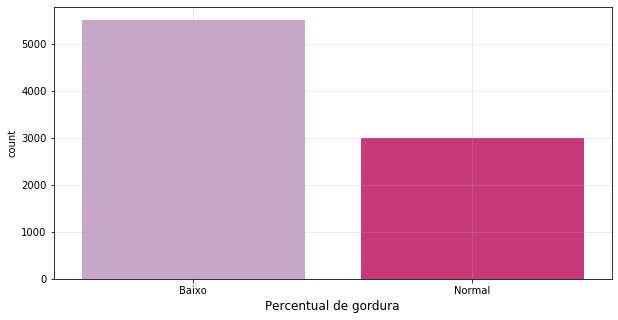

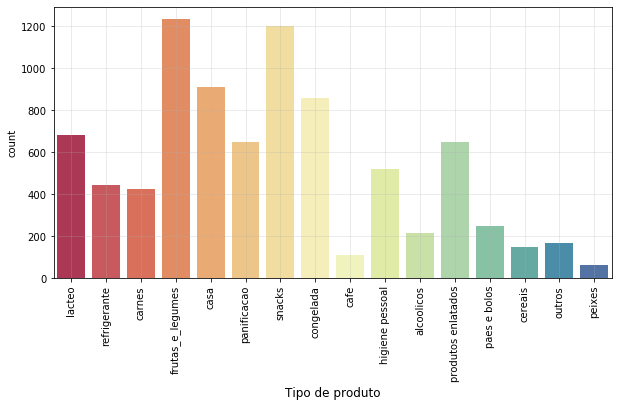

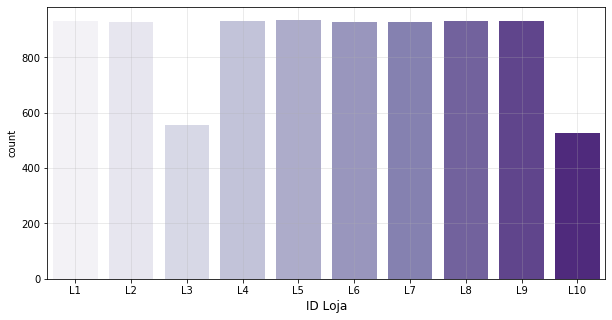

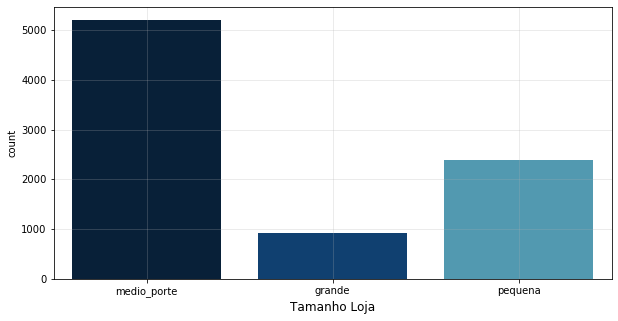

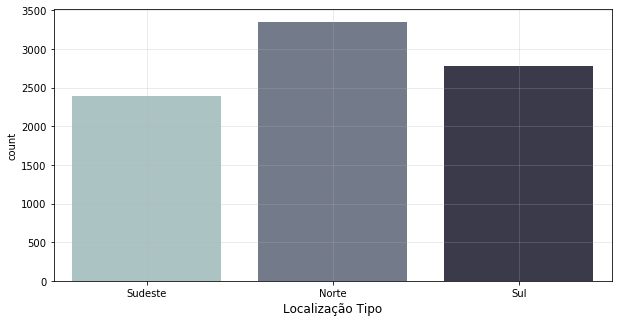

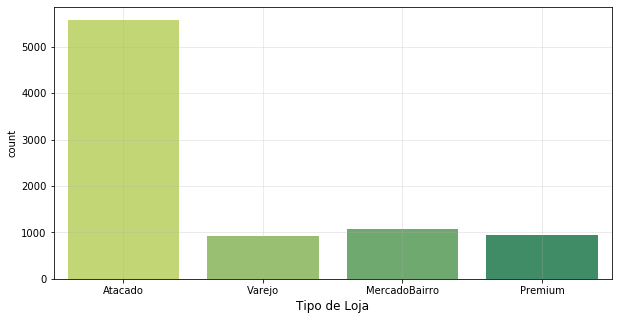

In [40]:
palletes = ['Spectral_r', 'PuRd', 'Spectral', 'Purples', 'ocean', 'bone_r', 'summer_r']
labels = ['IDProduto', 'Percentual de gordura', 'Tipo de produto', 'ID Loja', 'Tamanho Loja', 'Localização Tipo', 'Tipo de Loja']

for i in range(len(df_train_cat.columns)):
    plt.figure(figsize=(10,5))
    if df_train_cat.columns[i] != 'IDProduto':
        if df_train_cat.columns[i]=='TipoProduto':
            plt.xticks(rotation=90)
        sns.countplot(x=df_train_cat.columns[i],
                      data=df_train_cat,
                      palette=palletes[i])
        plt.xlabel(labels[i], fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.show()

<b>Categoric columns considerations</b>

`PerGordura`- The items most offered by the chain are items with low fat content.

`Product Type` - fruits, vegetables and snacks are the most offered in stores.

`IDStore` - Offered items are evenly distributed among retail outlets, except L3 and L10, which are significantly lower.

`Size Store` - Most of Sacolão's outlets are medium in size.

`LocalizacaoTipo` - The largest number of localities is in the North region.

`TipoLoja` - The biggest type of store is wholesale.

In [41]:
df_train_not_null['TipoLoja'].value_counts()

Atacado          5577
MercadoBairro    1083
Premium           935
Varejo            928
Name: TipoLoja, dtype: int64

### Plotting for numerical columns

Here, we will analyze the graphics for the numerical variables present in the DataFrame

#### Multiples plots

In [42]:
df_train_num.columns

Index(['Peso', 'Visibilidade', 'PrecoMax', 'AnoLoja', 'Vendas'], dtype='object')

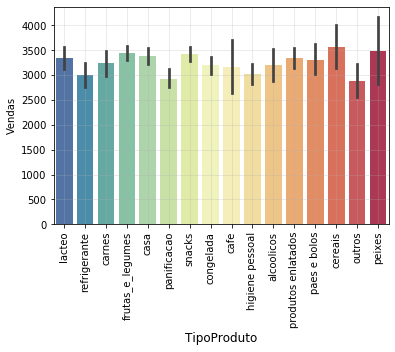

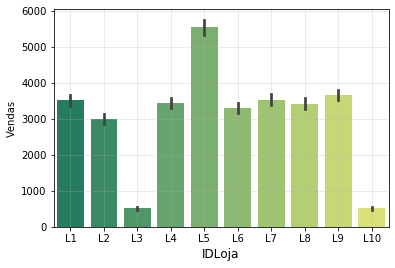

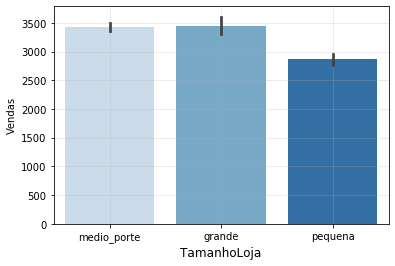

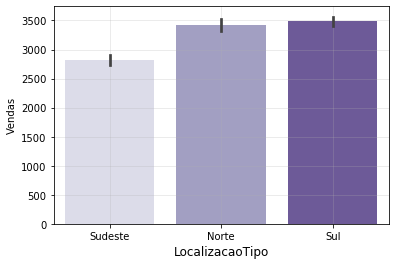

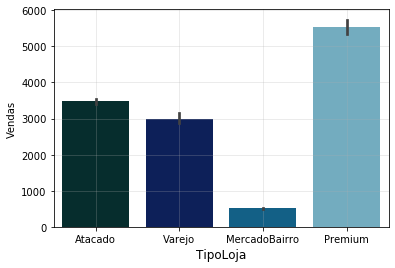

In [43]:
palletes = ['Spectral_r', 'summer', 'Blues', 'Purples', 'ocean']
types = np.delete(df_train_cat.columns.values, [0,1])

for i, item in enumerate(types):
    if item == 'TipoProduto':
        plt.xticks(rotation=90)        
    sns.barplot(x=df_train_not_null[item],
                y=df_train_not_null['Vendas'],
                  data=df_train_not_null,
                  palette=palletes[i]
                 )
    plt.xlabel(types[i], fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

<b>Some Considerations</b>

- Little variation in sales by product types
- The L5 store stands out with more sales compared to other stores. There is a reasonable difference between each point of sale
- There is little difference in sales between medium and large stores. This suggests that there is no direct relationship between store size (medium and large) and sales volume.
- The North and South regions are similar in the number of sales and higher than the Southeast region.
- Although the Wholesale stores are in greater number, the Premium stores are superior in sales when compared to other types of stores. MercadoBairro stores, as seen above, have a lower performance compared to others.

### Analysis of aggregated variables

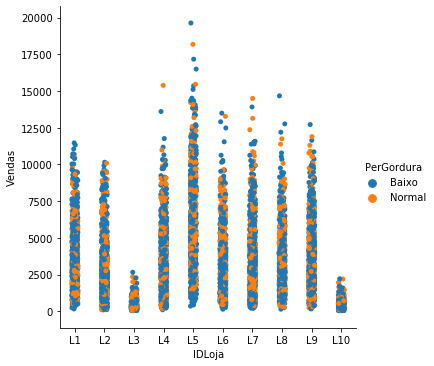

In [44]:
sns.catplot(x='IDLoja', y='Vendas', hue='PerGordura', data=df_train_not_null)

> - We see a greater reach in the number of sales of L5 stores when compared to other stores. The predominance of the color blue over orange is noticed, which suggests a greater sale of products with low fat content.

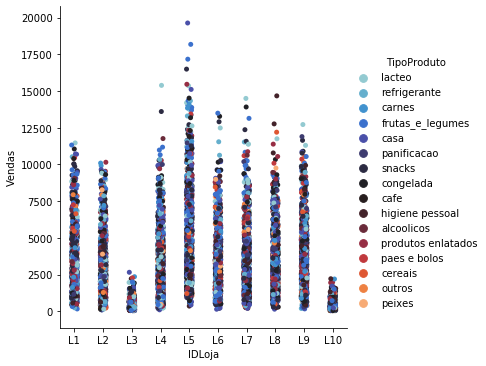

In [45]:
sns.catplot(x='IDLoja', y='Vendas', hue='TipoProduto', palette='icefire', data=df_train_not_null)

- From the graph, it is possible to verify the predominance of items sold by store. We see that products like fruits and vegetables, snacks, house and meat appear more often at the expense of items such as fish, cereals and others.

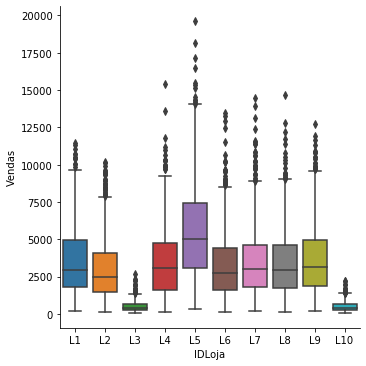

In [46]:
sns.catplot(x='IDLoja', y='Vendas', kind='box', data=df_train_not_null)

- We see that there is little variance between the groups, with L5 (Premium) stores having a higher median, while L3 and L10 (Neighborhood) stores have a lower median value.

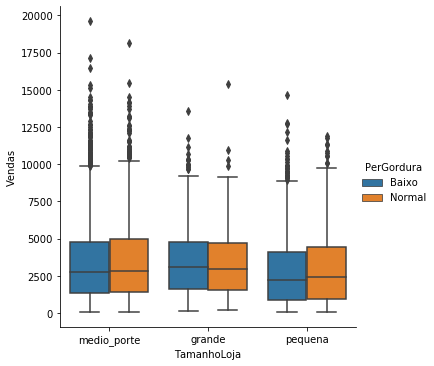

In [47]:
sns.catplot(x='TamanhoLoja', y='Vendas', kind='box', hue="PerGordura", data=df_train_not_null)

- The variance between groups also remained constant when separated by store size. The median of large and medium-sized stores is slightly higher than those of small ones. There was no differentiation in terms of fat percentage of items sold.

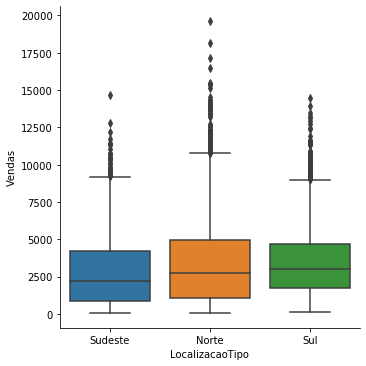

In [48]:
sns.catplot(x='LocalizacaoTipo', y='Vendas', kind='box', data=df_train_not_null)

- The medians related to the North and South regions are slightly higher when compared to the Southeast region.

<Figure size 1440x1440 with 0 Axes>

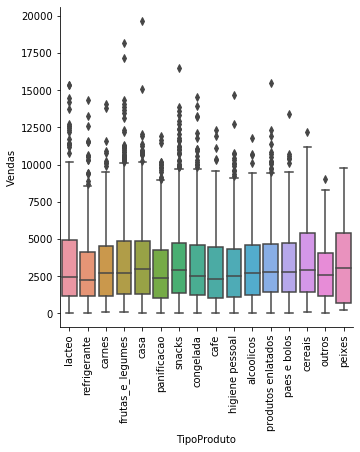

<Figure size 1440x1440 with 0 Axes>

In [49]:
sns.catplot(x='TipoProduto', y='Vendas', kind='box', data=df_train_not_null)
plt.xticks(rotation=90)
plt.figure(figsize=(20,20))

- The medians of items sold remain very close, with low variance between groups, good dispersion and symmetry.

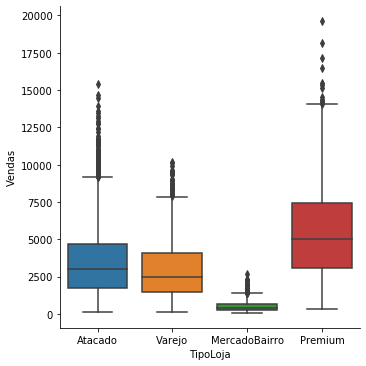

In [50]:
sns.catplot(x='TipoLoja', y='Vendas', kind='box', data=df_train_not_null)

- There is clearly a variation between dispersion, symmetry and sales position in the Bairro market against other types of stores. Premium stores have a greater median and greater dispersion with good symmetry.

#### Analysing Vendas by groupby categorical features

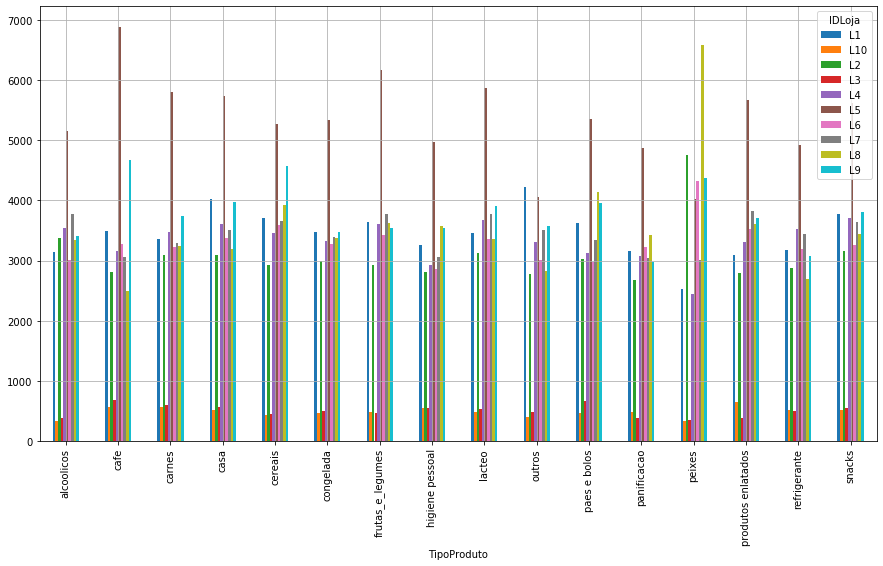

In [51]:
df_train_not_null.groupby(['TipoProduto', "IDLoja"])['Vendas'].mean().unstack().plot.bar(figsize=(15,8), grid=True)

- The graph shows granularity by Products and Stores of the quantity sold. We clearly see the good sales performance of L5 (premium) stores in relation to the others.


Note the smaller number of sales of products from stores L3 and L10 (Neighborhood). L8 stores have a superior performance in the sale of fish, which can be an indication of preference in this store and specific actions for these customers can be addressed.

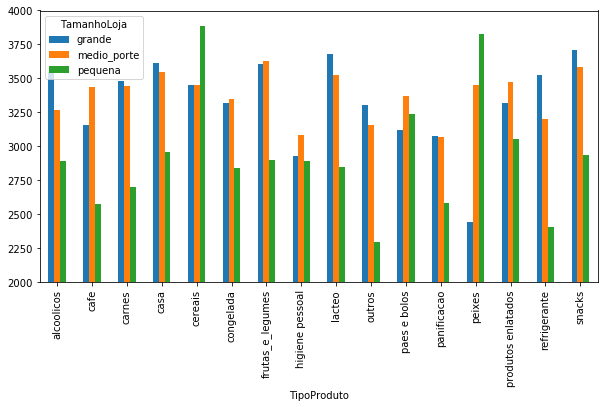

In [52]:
df_train_not_null.groupby(['TipoProduto', "TamanhoLoja"])['Vendas'].mean().unstack().plot.bar(figsize=(10,5), ylim=(2000,4000))

- The graph shows the little variation in the sale of products to medium and large stores. For most products, sales are lower for small stores, except for cereals and fish. The sale of fish showed great variation for the three sizes of stores.

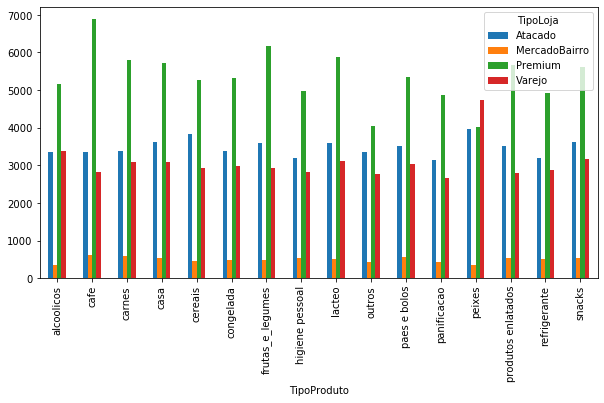

In [53]:
df_train_not_null.groupby(['TipoProduto', "TipoLoja"])['Vendas'].mean().unstack().plot.bar(figsize=(10,5))

- The data show the big difference in the sale of products for different types of stores. Highlight for Premium stores with large sales volume and MercadoBairro stores with a much smaller volume.

### Statistical Plots

#### Plotting histograms of the numeric variables

<b> Plot df_treinamento</b>

Peso
Visibilidade
PrecoMax
AnoLoja
Vendas


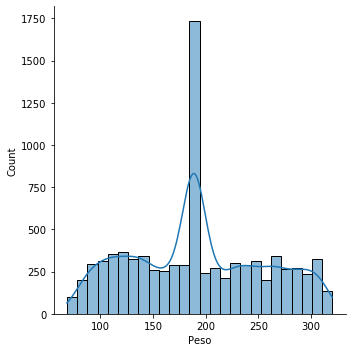

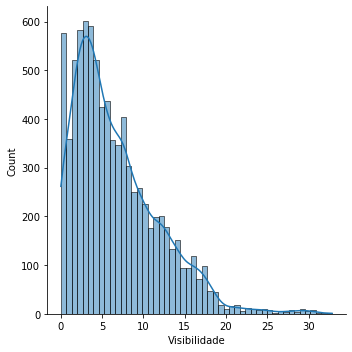

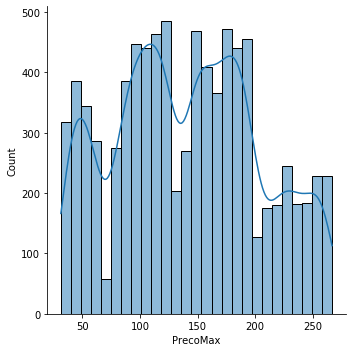

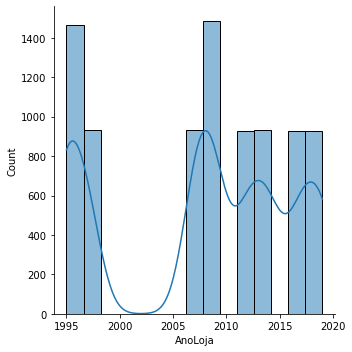

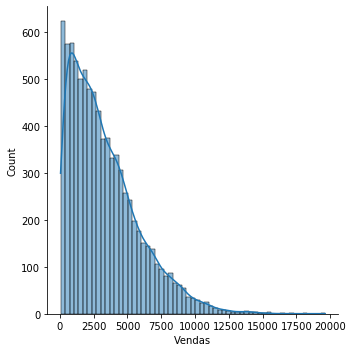

In [54]:
#Plotting histograms for numeric variables
def plot_hist(df):
    for item in (df.columns):
        if (isinstance(df[item].iloc[0], np.int64)) or (isinstance(df[str(item)].iloc[0], np.float64)):
            print(item)
            sns.displot(x=item, data=df, kde=True)
plot_hist(df_train_not_null)

<b> Plot df_teste</b>

Peso
Visibilidade
PrecoMax
AnoLoja


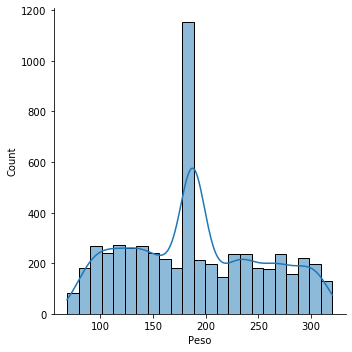

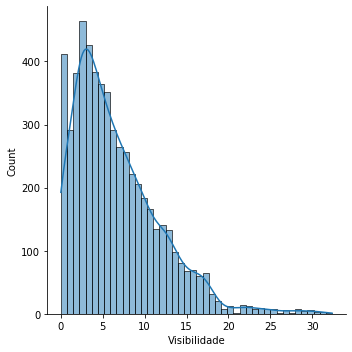

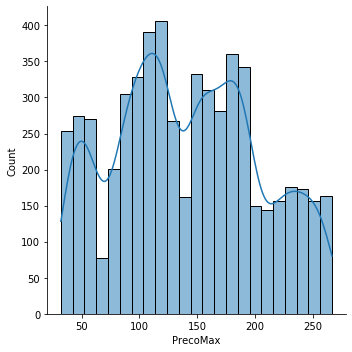

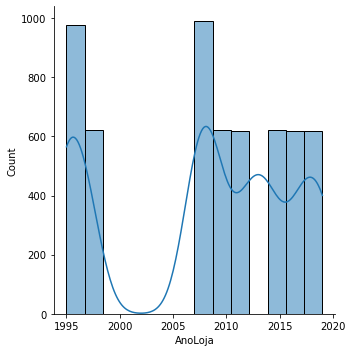

In [55]:
plot_hist(df_teste_not_null)

<b> Partial conclusions: </b>
- Deviation from the normal distribution.
- Have appreciable positive asymmetry.

Analyzing the behavior of the distribution of the response variable `Sales` we see that it <b>does not</b> follow a <b>normal distribution</b> it is possible that we apply a transformation to it, as it is necessary to stabilize the variance making the data more similar to a normal distribution, in addition to improving the validity of measures of association (such as the Pearson correlation between variables)

### Testing the correlation of numerical values

                  Peso  Visibilidade  PrecoMax   AnoLoja    Vendas
Peso          1.000000     -0.014168  0.024951  0.007739  0.009693
Visibilidade -0.014168      1.000000 -0.001315 -0.074834 -0.128625
PrecoMax      0.024951     -0.001315  1.000000  0.005020  0.567574
AnoLoja       0.007739     -0.074834  0.005020  1.000000 -0.049135
Vendas        0.009693     -0.128625  0.567574 -0.049135  1.000000


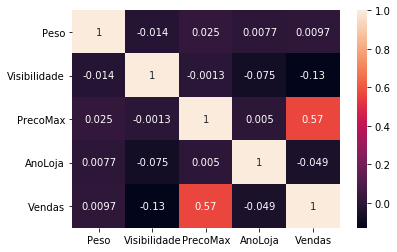

In [56]:
print(df_train_num.corr())
sns.heatmap(df_train_num.corr(), annot=True)

                  Peso  Visibilidade  PrecoMax   AnoLoja
Peso          1.000000     -0.018342  0.045048  0.025678
Visibilidade -0.018342      1.000000 -0.014013 -0.097040
PrecoMax      0.045048     -0.014013  1.000000 -0.007233
AnoLoja       0.025678     -0.097040 -0.007233  1.000000


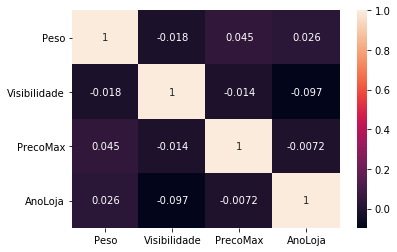

In [57]:
print(df_test_num.corr())
sns.heatmap(df_test_num.corr(), annot=True)

<b> Partial conclusion:</b>

`Vendas` is strongly correlated with `PrecoMax`, however, correlation does not indicate causality

## Feature Enginnering

Here, we will make the necessary transformations to adapt the variables to be analyzed in the ML models.

<b>Categorical Variables:</b>
- Ordinal:
    - `PerGordura`
    - `TamanhoLoja`
    - `LocalizacaoTipo`
- Nominal:
    - `IDProduto`
    - `TipoPorduto`
    - `IDLoja`
    - `TipoLoja`

<b>Numerical Variables:</b>
- `AnoLoja`

> The columns `ProductID`,`AnoLoja`, `IDLoja` do not have significant values and can be removed.
>
> Columns with many categories will be encoded with Pandas get_dummies

In [58]:
#Removing not significant columns and creating new DataFrame
df_train_fe = df_train_not_null.drop(['IDProduto', 'AnoLoja', 'IDLoja'], axis=1)
df_test_fe = df_teste_not_null.drop(['IDProduto', 'AnoLoja', 'IDLoja'], axis=1)

In [59]:
#Using pandas get_dummies to transform categorical values
cols = ['PerGordura', 'TamanhoLoja', 'LocalizacaoTipo', 'TipoProduto', 'TipoLoja']
dum_df_train = pd.get_dummies(df_train_fe, columns=cols)
dum_df_test = pd.get_dummies(df_test_fe, columns=cols)

In [60]:
dum_df_train.head()

,Peso,Visibilidade,PrecoMax,Vendas,PerGordura_Baixo,PerGordura_Normal,TamanhoLoja_grande,TamanhoLoja_medio_porte,TamanhoLoja_pequena,LocalizacaoTipo_Norte,...,TipoProduto_paes e bolos,TipoProduto_panificacao,TipoProduto_peixes,TipoProduto_produtos enlatados,TipoProduto_refrigerante,TipoProduto_snacks,TipoLoja_Atacado,TipoLoja_MercadoBairro,TipoLoja_Premium,TipoLoja_Varejo
0,139.50,1.604730,249.8092,5602.7070,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,88.80,1.927822,48.2692,665.1342,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
2,262.50,1.676007,141.6180,3145.9050,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,288.00,0.000000,182.0950,1098.5700,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,133.95,0.000000,53.8614,1492.0578,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


Text(0.5, 1.05, 'Disperção entre as variáveis')

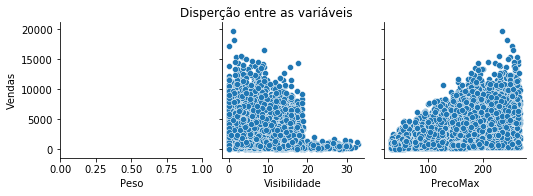

In [61]:
#fig, ax = plt.subplots()
ax = sns.pairplot(df_train_not_null, y_vars='Vendas', x_vars=df_train_num.drop(columns=['Vendas', 'AnoLoja'], axis = 1).columns)
ax.fig.suptitle('Disperção entre as variáveis', y=1.05)

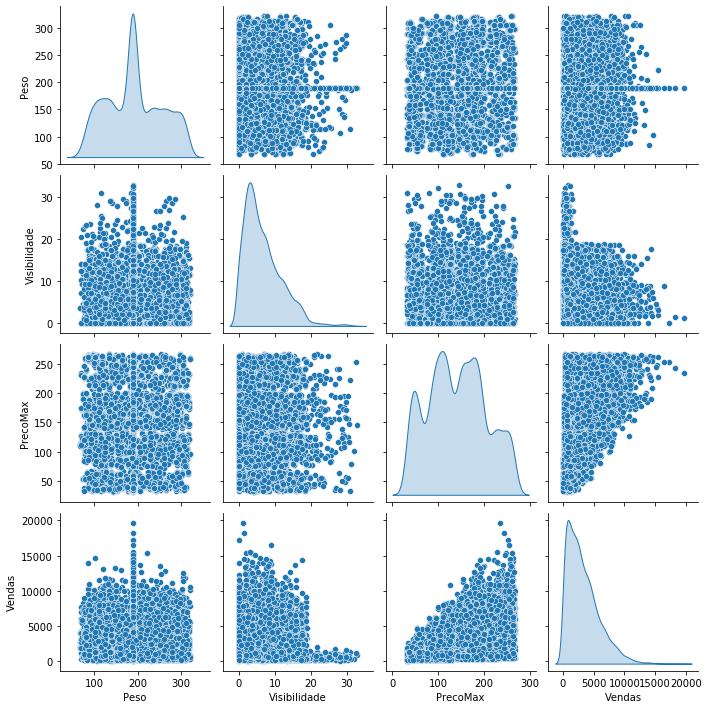

In [62]:
sns.pairplot(df_train_num.drop(columns=['AnoLoja'], axis=1), diag_kind='kde')

<b>Partial Conclusion:</b>

At first glance there is a linear relationship between the dependent variable `Vendas` and the independent variable `PrecoMax` when plotted against each other. The other variables do not show a linear relationship with the target variable.

## Building Machine Learning Models

Now, we will build linear regression models, Random Forest and XGBoost and compare them. Finally, we will use the most accurate model respecting the assumptions.

In [63]:
#Defining target (will be predicted)
y = dum_df_train['Vendas']

#Defining predictors variables
X = dum_df_train.drop('Vendas', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression Approach

In [64]:
#Instance model
lr_model = LinearRegression(normalize=True)

#Fitting model
lr_model.fit(X_train, y_train)

#Predicting model
y_fitted = lr_model.predict(X_test)

#### Cross validation

In [65]:
from sklearn.model_selection import KFold

In [66]:
kfold_splitter = KFold(n_splits=5)

In [67]:
folds = list(kfold_splitter.split(X=dum_df_train))

In [68]:
from sklearn.model_selection import cross_validate

In [69]:
features = [x for x in dum_df_train.columns if x not in ['Vendas', 'Vendas_predict', 'residue']]
cv_scores = cross_validate(
    estimator = lr_model, 
    X=dum_df_train[features], 
    y=dum_df_train['Vendas'], 
    cv=KFold(shuffle=True), 
    scoring='r2'
)

In [70]:
# Test_score = quanto maior o valor, melhor
pd.DataFrame(cv_scores).mean()

fit_time      0.012272
score_time    0.000000
test_score    0.558387
dtype: float64

According to <b>scoring functions</b> `neg_mean_absolute_error` the higher its value, the better the performance of the model.

Applying the sklearn package's <b>CVS</b> method to 5 Folds:

In [71]:
def cross_validation(model_name, model, X, y, cv):
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average score: {round(scores.mean(),4)}')

In [72]:
#score variables
LR_MAE = round(MAE(y_test, y_fitted),2) #Mean Absolute Error
LR_MSE = round(MSE(y_test, y_fitted),2) #Mean Square Error
LR_R_2 = round(R2(y_test, y_fitted),4)  #R2_score
LR_CS  = round(CVS(lr_model, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")
cross_validation(lr_model, LinearRegression(), X, y, 5)

 Mean Absolute Error: 1190.37

 Mean Squared Error: 2582651.32

 R^2 Score: 0.5777

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True) Scores:
0.57
0.55
0.55
0.56
0.56
Average score: 0.5579


In [73]:
Linear_Regression_model=pd.DataFrame({'y_test':y_test,'prediction':y_fitted})
Linear_Regression_model.head()

,y_test,prediction
7503,2614.5966,2046.0
2957,535.3032,1168.0
7031,566.2629,1198.0
1084,8667.7173,6334.0
856,3535.3980,4914.0


In [74]:
Linear_Regression_model['residue'] = Linear_Regression_model['y_test'] - Linear_Regression_model['prediction']
Linear_Regression_model.head()

,y_test,prediction,residue
7503,2614.5966,2046.0,568.5966
2957,535.3032,1168.0,-632.6968
7031,566.2629,1198.0,-631.7371
1084,8667.7173,6334.0,2333.7173
856,3535.3980,4914.0,-1378.6020


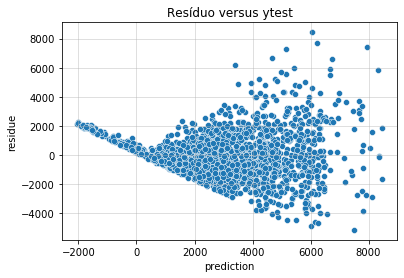

In [75]:
sns.scatterplot(y = Linear_Regression_model['residue'], x = Linear_Regression_model['prediction'])
plt.title('Resíduo versus ytest')
plt.grid(True, alpha=0.5)

#### Inspecting model residue

The residual represents the amount of variability that Y that the fitted model cannot explain. And the residuals can be calculated with the following formula:

residue = Y-Yˆ

Where Y is the real value and Y^ is the predicted value

In [76]:
import statsmodels.api as sm

In [77]:
#Creating a column with data predict
dum_df_train['Vendas_predict'] = lr_model.predict(X)

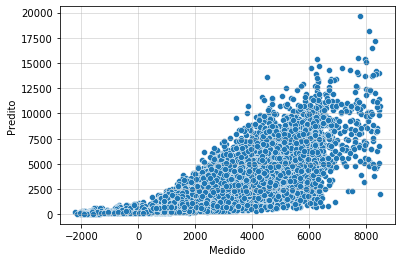

In [78]:
sns.scatterplot(x = dum_df_train['Vendas_predict'], y= dum_df_train['Vendas'])
plt.ylabel('Predito')
plt.xlabel('Medido')
plt.grid(True, alpha=0.5)

In [79]:
dum_df_train['residue'] = dum_df_train['Vendas_predict'] - dum_df_train['Vendas']

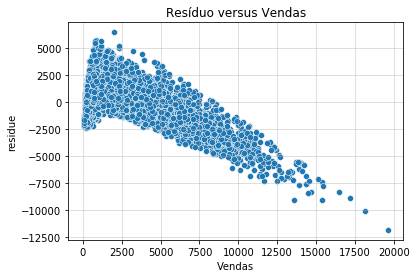

In [80]:
sns.scatterplot(y = dum_df_train['residue'], x = dum_df_train['Vendas'])
plt.title('Resíduo versus Vendas')
plt.grid(True, alpha=0.5)

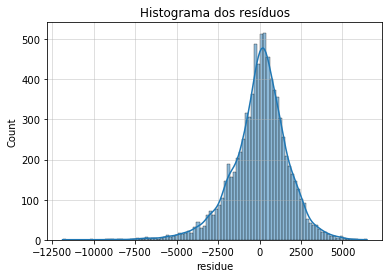

In [81]:
hist = sns.histplot(dum_df_train['residue'], kde=True)
plt.title("Histograma dos resíduos")
plt.grid(True, alpha=0.5)

((array([-3.77092014, -3.54353752, -3.4185981 , ...,  3.4185981 ,
          3.54353752,  3.77092014]),
  array([-11872.4472, -10096.34  ,  -9128.9735, ...,   5695.5496,
           5792.1115,   6472.587 ])),
 (1669.5342898647732, 3.8063926317022063, 0.9855650995699827))

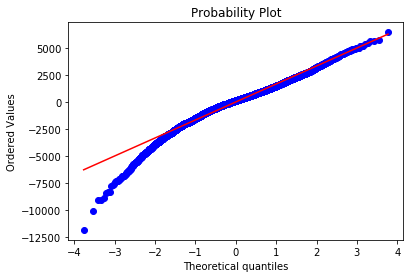

In [82]:
stats.probplot(dum_df_train['residue'].values, plot=pylab)

In [83]:
dum_df_train[['Vendas', 'Vendas_predict', 'residue']].head(10)

,Vendas,Vendas_predict,residue
0,5602.7070,5892.0,289.2930
1,665.1342,846.0,180.8658
2,3145.9050,3478.0,332.0950
3,1098.5700,1618.0,519.4300
4,1492.0578,1468.0,-24.0578
5,834.9132,954.0,119.0868
6,515.3292,1604.0,1088.6708
7,6034.1454,4710.0,-1324.1454
8,1614.8979,2478.0,863.1021
9,7065.8025,4554.0,-2511.8025


#### Shapiro-Wilk test

In [84]:
#Shapiro-Wilk test
shapiro_test, p_value = stats.shapiro(dum_df_train['residue'].values)
print(f'O valor do teste estatísstico é: {shapiro_test}\nO valor do p-value é: {p_value}')

O valor do teste estatísstico é: 0.9715701937675476
O valor do p-value é: 5.458676331947008e-38


c:\program files\python37\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<b>Partial Conclusion</b>

Analyzing the results of both the Shapiro-Wilk tests (p-value < 0.05 indicating non-normal distribution) and the residual graph, we verified that there is no adherence of the residuals to normality, not obeying the homoscedasticity assumption.

Typically, statistical tests require that the analyzed variables be normally distributed in the population, that is, that they meet the "normality assumption" (...) The problem can arise when trying to use a test based on the normal distribution to analyze data from variables that are not normally distributed. In such cases there are two options. First, some alternative "non-parametric" test (or "distribution-free" test) can be used; but this is often inconvenient because such tests are typically less powerful and less flexible in terms of the kinds of conclusions they can yield. Alternatively, in many cases a test based on the normal distribution can still be used if it is only certain that the sample sizes are large enough. Source: (https://www.inf.ufsc.br/~marcelo.menezes.reis/intro.html#Por+que+a+distribui%E7%E3o+normal+%E9)

The residuals shown show <b>Heteroscedasticity</b> whose dispersion is a linear function of the losing values:

$$\sigma_{i}^2 = \sigma^2 X_{i}$$

Even so, let's analyze the model summary through the `statismodels` package and check the metrics, predictor coefficients and their `p-value` significance.

#### Statsmodels Anlysis

In [85]:
features = [x for x in dum_df_train.columns if x not in ['Vendas', 'Vendas_predict', 'residue']]

In [86]:
modelo_ols = sm.OLS(dum_df_train['Vendas'],dum_df_train[features]).fit()

In [87]:
print(modelo_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     420.4
Date:                Fri, 29 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:13:25   Log-Likelihood:                -75454.
No. Observations:                8523   AIC:                         1.510e+05
Df Residuals:                    8496   BIC:                         1.512e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Peso        

<b>According to the OLS analysis, the predictor variables that have statistical significance with a significance level of 0.05% were listed below:</b>

Applying the `stepwise` regression method to improve the model, we have:

In [88]:
new_features = [x for x in dum_df_train.columns if x not in ['Vendas', 'Vendas_predict', 'residue',
                                                            'Peso', 'Visibilidade', 'PerGordura_Normal',
                                                            'TamanhoLoja_medio_porte','LocalizacaoTipo_Norte',
                                                            'LocalizacaoTipo_Sul', 'TipoProduto_alcoolicos',
                                                            'TipoProduto_cafe', 'TipoProduto_carnes',
                                                            'TipoProduto_casa', 'TipoProduto_cereais',
                                                            'TipoProduto_congelada', 'TipoProduto_frutas_e_legumes',
                                                            'TipoProduto_higiene pessoal', 'TipoProduto_lacteo',
                                                            'TipoProduto_outros', 'TipoProduto_paes e bolos',
                                                            'TipoProduto_panificacao', 'TipoProduto_peixes',
                                                            'TipoProduto_produtos enlatados', 'TipoProduto_refrigerante',
                                                            'TipoProduto_snacks', 'IDLoja_L7', 'TamanhoLoja_grande',
                                                            'IDLoja_L4']]

In [89]:
modelo_ols_dropado = sm.OLS(dum_df_train['Vendas'],dum_df_train[new_features]).fit()
print(modelo_ols_dropado.summary())

                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     1563.
Date:                Fri, 29 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:13:25   Log-Likelihood:                -75458.
No. Observations:                8523   AIC:                         1.509e+05
Df Residuals:                    8515   BIC:                         1.510e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
PrecoMax                  

As noted, the OLS models created belonging to the <b>GLM</b> did not show a very acceptable parameter through the available metrics, let's see through the indicators presented in `OLS.sumary()`:

    - Df Residuals: 8511 -> Shows that the model obtained 8511 degrees of freedom
    - Df Model: 10 -> Numbers the forecast variables
    - R-squared: 0.563 -> Measure of how much of the independent variable is explained by changes in the dependent variables. 0.563 means that the model explains 56.3% of the change in the Sales variable
    - Adj.R-squared:0.563 -> helps to analyze the effectiveness of multiple model dependent variables
    - F-statistic: 1098 -> Compares the linear model produced for the variables with a model that replaces the effect of your variables with 0, to find out if the group of variables is statistically significant.
    - Prob(F-stasts):0.00 -> Number to inform the precision of the null hypothesis, or if the effect of its variables needs to be 0. In this case, it is informing us of a 0.00% chance of this.
    - Log-Likehood:-75448 -> Is a numerical signifier s the probability that your model produced the given data
    - Omnibus: 967,869 -> Describe the normality of the distribution of our residuals using slope and kurtosis as measures. A 0 would indicate perfect normality.
    - Prob(Omnibus):0.000 -> Statistical test that measures the probability that the residuals are normally distributed.

#### Applying Box-Cox transformation on target 

Due to the non-normality of the model's residuals, we applied a Box-Cox transformation on the response variable. These transformations in the response variable are the first step towards a generalized linear regression model (Generalized Linear Models or GLM)

In [90]:
#Box-cox transformation
boxcox = stats.boxcox(dum_df_train['Vendas'].values)

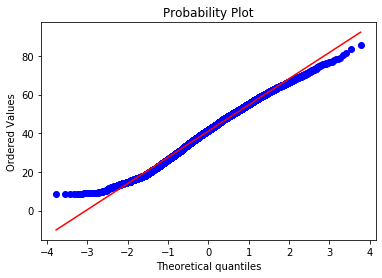

In [91]:
stats.probplot(boxcox[0], plot=pylab)
pylab.show()

In [92]:
#Shapiro-Wilk test
shapiro_test, p_value = stats.shapiro(boxcox[0][:5000])
print(f'O valor do teste estatísstico é: {shapiro_test}\nO valor do p-value é: {p_value}')

O valor do teste estatísstico é: 0.9931227564811707
O valor do p-value é: 8.285301054445932e-15


<b>Partial Conclusion:</b>

The Shapiro test still points to a non-normality in the distribution. Even after transforming the Y variable by the Box-Cox method, there was no adherence to the normality of the residues

Predicting the target variable in the test dataset

In [93]:
#Predicting target in the test dataset
y_ln_predict_test = lr_model.predict(dum_df_test)
y_ln_predict_test

array([2660., 2136., 2776., ..., 2956., 5314., 2086.])

### Random Forest Approach

Random Forest is an algorithm that uses a set learning method for classification and regression.

It operates by building a multitude of decision trees at the time of training and producing the class which is the mode of the classes (classification) or average prediction (regression) of the individual trees.

In [94]:
#Creating Model
RF=RandomForestRegressor(n_estimators=250,
                          max_depth=5,
                          min_samples_leaf=100,
                          n_jobs=4,
                          random_state=101)

#Fitting model
RF.fit(X_train, y_train)

#predict
y_predict = RF.predict(X_test)

#score variables
RFR_MAE = round(MAE(y_test, y_predict),2)
RFR_MSE = round(MSE(y_test, y_predict),2)
RFR_R_2 = round(R2(y_test, y_predict),4)
RFR_CS  = round(CVS(RF, X, y, cv=5).mean(),4)



print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_validation(RF, RandomForestRegressor(), X, y, 5)

 Mean Absolute Error: 1073.88

 Mean Squared Error: 2330387.69

 R^2 Score: 0.6189

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=100,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=4, oob_score=False,
                      random_state=101, verbose=0, warm_start=False) Scores:
0.56
0.53
0.52
0.55
0.56
Average score: 0.5456


In [95]:
res_RF = y_test - y_predict

In [96]:
#sns.scatterplot(y_test, y_predict)

### XGBRegressor

XGBoost stands for "Extreme Gradient Boosting" and is an implementation of the gradient-boosting tree algorithm. XGBoost is a popular model of supervised machine learning with features such as computing speed, parallelization and performance.

In [97]:
#Instance Model
model_xg = XGBRegressor(verbosity=0)
print(model_xg)

#Fitting
model_xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
             subsample=None, tree_method=None, validate_parameters=None,
             verbosity=0)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [98]:
#Predicting
train_pred1 = model_xg.predict(X_test)
train_pred1

array([1396.4113, 1412.3823,  964.3392, ..., 1098.1814, 1039.1398,
       2355.7156], dtype=float32)

Check the model training score

In [99]:
score = model_xg.score(X_test, y_test)  
print("Training score: ", score)

Training score:  0.5381342161223351


Apply the cross-validation method to evaluate the training score

In [100]:
scores = CVS(model_xg, X_test, y_test, cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.46


In [101]:
#ypred = model_xg.predict(X_test)
mse = MSE(y_test, train_pred1)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 2824509.09
RMSE: 1680.63


In [102]:
residuo_XGB = y_test - train_pred1

In [103]:
#sns.scatterplot(y_test, residuo_XGB)

In [104]:
#score variables
XGB_MAE = round(MAE(y_test, train_pred1),2)
XGB_MSE = round(MSE(y_test, train_pred1),2)
XGB_R_2 = round(R2(y_test, train_pred1),4)
XGB_CS  = round(CVS(model_xg, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {XGB_MAE}\n")
print(f" Mean Squared Error: {XGB_MSE}\n")
print(f" R^2 Score: {XGB_R_2}\n")
cross_validation(model_xg, XGBRegressor(), X, y, 5)

 Mean Absolute Error: 1179.04

 Mean Squared Error: 2824509.09

 R^2 Score: 0.5381

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0) Scores:
0.56
0.5
0.48
0.53
0.56
Average score: 0.525


## Evaluation

In [105]:
linear_regression_dict = {
'Mean Absolute Error' : LR_MAE,
'Mean Squared Error'  : LR_MSE,
'R^2 Score' : LR_R_2,
'Cross-Validation' : LR_CS
}

random_forest_dict = {
'Mean Absolute Error' : RFR_MAE,
'Mean Squared Error'  : RFR_MSE,
'R^2 Score' : RFR_R_2,
'Cross-Validation' : RFR_CS
}

XGBRegressor_dict = {
'Mean Absolute Error' : XGB_MAE,
'Mean Squared Error'  : XGB_MSE,
'R^2 Score' : XGB_R_2,
'Cross-Validation' : XGB_CS
}

df_LR = pd.DataFrame(linear_regression_dict, index=np.arange(1))
df_RF = pd.DataFrame(random_forest_dict, index=np.arange(1))
df_XGB = pd.DataFrame(XGBRegressor_dict, index=np.arange(1))

df_all_models = pd.concat([df_LR, df_RF, df_XGB], ignore_index=True)
df_all_models['models']=['linear_regression', 'random_forest', 'XGBRegressor']

df_all_models.set_index(['models'], inplace=True)

In [106]:
df_all_models

,Mean Absolute Error,Mean Squared Error,R^2 Score,Cross-Validation
models,,,,
linear_regression,1190.37,2582651.32,0.5777,0.5579
random_forest,1073.88,2330387.69,0.6189,0.5914
XGBRegressor,1179.04,2824509.09,0.5381,0.5250


### Interpreting the model

We will use the SHAP tool (SHapley Additive exPlanations) to try to explain the behavior of the variables in the model.

In [107]:
import shap
#load JS visualization code to notebook
shap.initjs()

In [108]:
modelos = [lr_model, RF, model_xg]
explainer = shap.Explainer(modelos[1])

#Try use shap to LR
#explainer_lr = shap.KernelExplainer(modelos[0])

In [109]:
%time shap_values = explainer(dum_df_test[features])

Wall time: 2.06 s


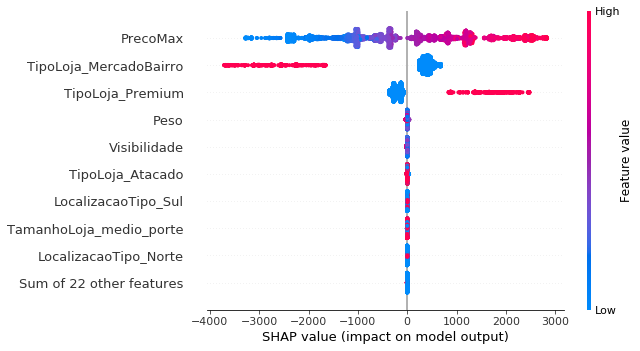

In [110]:
shap.plots.beeswarm(shap_values)

Through the `beewarm` it is possible to investigate which of the variables is more significant in the model, where the colors represent the values of each observation of the feature. The blue color represents smaller ones, and for larger values the point is represented by the red color.

The X axis represents the impact on the model. Therefore, we can assess that higher values for the variable `PrecoMax` have a greater impact on the performance of the model's forecast, while high values for the variable `TipoLoja_MercadoBairro` have a negative impact on the forecast.

Likewise, the variable `TipoStore_Premium` has a positive impact when its values are larger.

Checking the average importance of each variable through Shap:

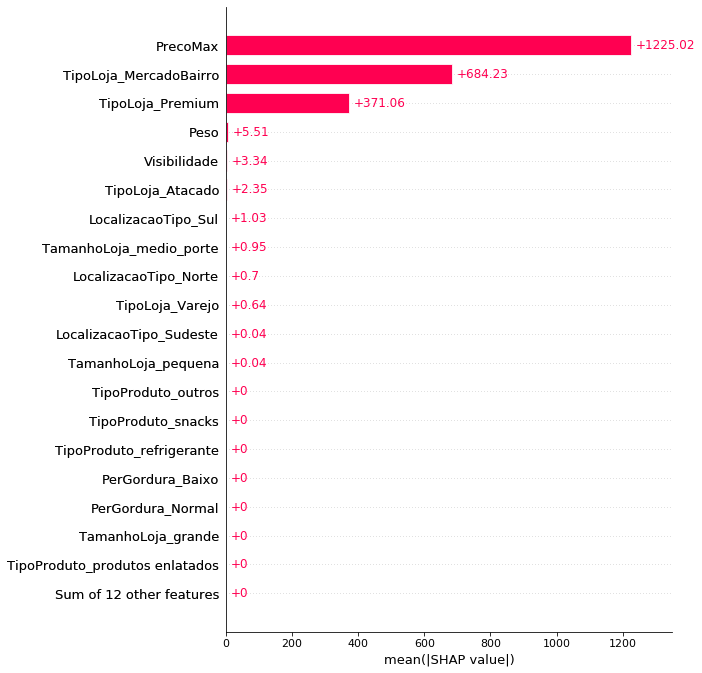

In [111]:
shap.plots.bar(shap_values.abs.mean(0), max_display=20)

Looking at the `features importances`, we see again that the most relevant variables for the model are: `PrecoMax`, `TipoLoja_Premium` and `TipoLoja_MercadoBairro`. The other features proved not to be relevant to explain the behavior of the Y variable.

### Feature importance

In [112]:
var_imp = pd.DataFrame(zip(features, modelos[1].feature_importances_), columns=['feature', 'importancia']).sort_values(by='importancia', ascending=False)

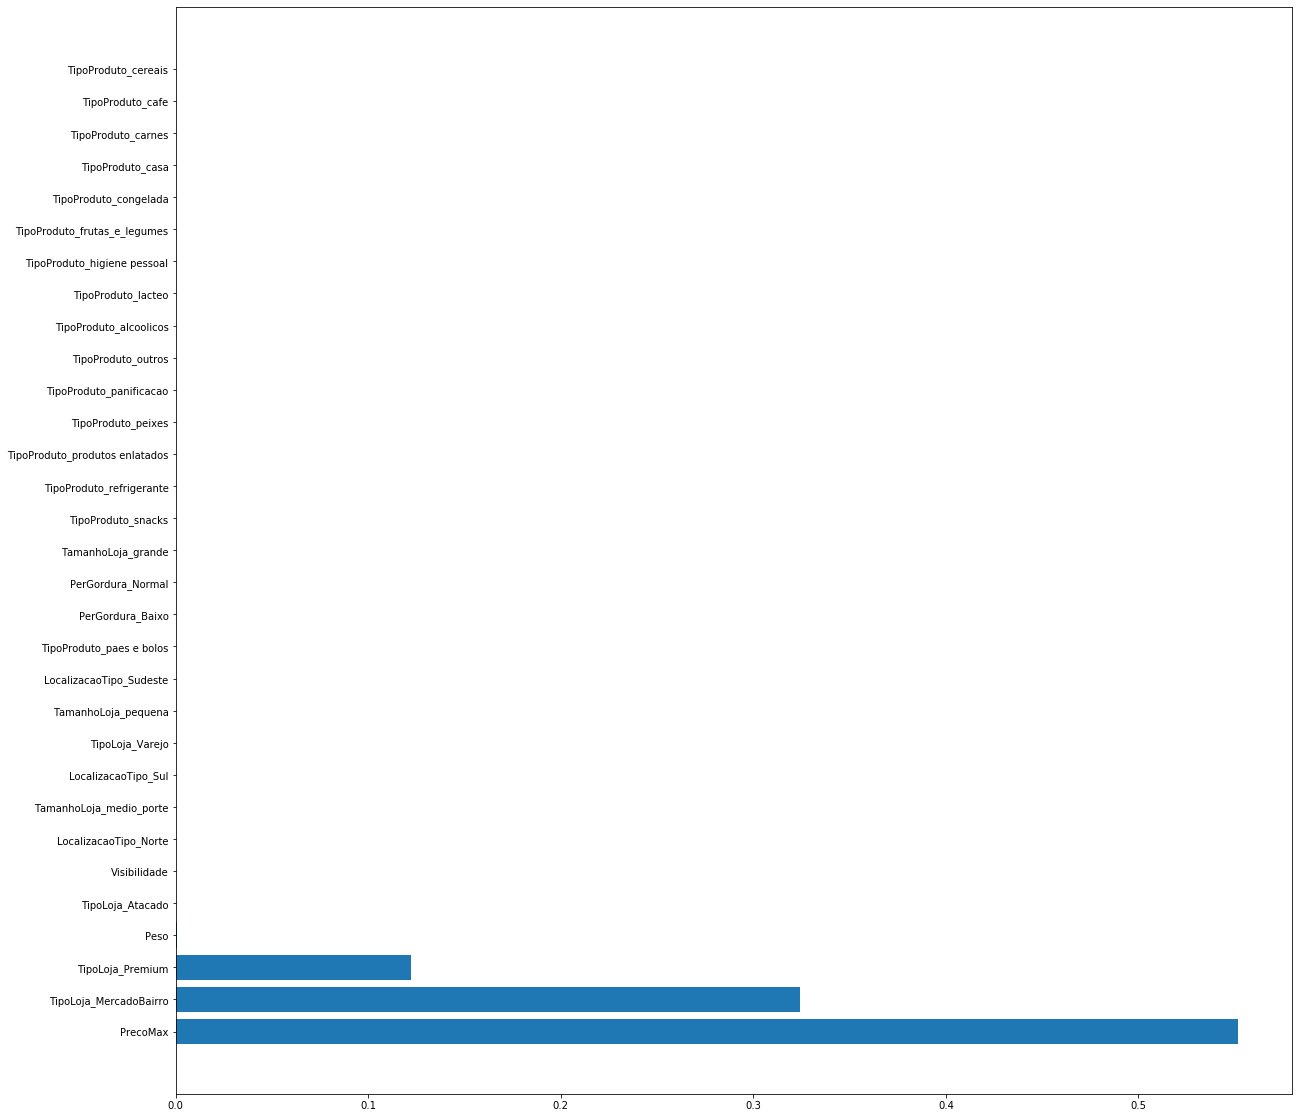

In [113]:
fig, ax = plt.subplots(figsize=(20,20))
ax = ax.barh(var_imp['feature'],var_imp['importancia'])

Model refinement, eliminating variables that do not help in the prediction and performing a new cross-validation of the model, in an iterative way, until reaching a good result.

In [114]:
threshold = 0.040
var_imp.loc[var_imp['importancia'] < threshold]

,feature,importancia
0,Peso,0.000500
27,TipoLoja_Atacado,0.000455
1,Visibilidade,0.000350
8,LocalizacaoTipo_Norte,0.000156
6,TamanhoLoja_medio_porte,0.000106
10,LocalizacaoTipo_Sul,0.000090
30,TipoLoja_Varejo,0.000089
7,TamanhoLoja_pequena,0.000001
9,LocalizacaoTipo_Sudeste,0.000001
21,TipoProduto_paes e bolos,0.000000


In [115]:
variaveis_para_excluir = var_imp.loc[var_imp['importancia'] < threshold, 'feature'].tolist()
variaveis_para_excluir

['Peso',
 'TipoLoja_Atacado',
 'Visibilidade',
 'LocalizacaoTipo_Norte',
 'TamanhoLoja_medio_porte',
 'LocalizacaoTipo_Sul',
 'TipoLoja_Varejo',
 'TamanhoLoja_pequena',
 'LocalizacaoTipo_Sudeste',
 'TipoProduto_paes e bolos',
 'PerGordura_Baixo',
 'PerGordura_Normal',
 'TamanhoLoja_grande',
 'TipoProduto_snacks',
 'TipoProduto_refrigerante',
 'TipoProduto_produtos enlatados',
 'TipoProduto_peixes',
 'TipoProduto_panificacao',
 'TipoProduto_outros',
 'TipoProduto_alcoolicos',
 'TipoProduto_lacteo',
 'TipoProduto_higiene pessoal',
 'TipoProduto_frutas_e_legumes',
 'TipoProduto_congelada',
 'TipoProduto_casa',
 'TipoProduto_carnes',
 'TipoProduto_cafe',
 'TipoProduto_cereais']

In [116]:
features_novas = [x for x in features if x not in variaveis_para_excluir]
features_novas

['PrecoMax', 'TipoLoja_MercadoBairro', 'TipoLoja_Premium']

### Training the model with the new hyperparameters

In [117]:
RF_2=RandomForestRegressor(n_estimators=250,
                          max_depth=5,
                          min_samples_leaf=100,
                          n_jobs=4,
                          random_state=101)

#Fitting the new model
RF_2.fit(X_train[features_novas], y_train)

#Predict the new model
y_predict_2 = RF_2.predict(X_test[features_novas])

#score variables
print(f'MAE: {round(MAE(y_test, y_predict_2),2)}')
print(f'MSE: {round(MSE(y_test, y_predict_2),2)}')
print(f'R2: {round(R2(y_test, y_predict_2),4)}')
print(f'CSV: {round(CVS(RF_2, X[features_novas], y, cv=5).mean(),4)}')

MAE: 1074.39
MSE: 2333790.83
R2: 0.6184
CSV: 0.5917


## Conclusion


According to the models created from the data provided by the Sacolão store chain, some conditions were observed that have the potential to answer some questions related, mainly, to the variable under observation, in this case, `Sales`.
Supervised regression models can contribute process information and deliver greater added value to the business. The model can help refine the business rule.

During the exploratory data analysis, some relevant factors are observed:

- <b> Analysis of the characteristics of categorical variables on the offer of products </b>

 - Separating the products by percentage of fat, it is noted that the greatest products offered are those with low fat content (64%).
<b>Business implications: </b> Strategies can be adopted to increase the supply of healthy products throughout the network, meeting demand.

 - According to the analyzed data, the fruit, vegetables and snacks sector are more offered. Right after that we have the home and frozen sectors.
the items less offered, according to the data, are fish, cereals and coffee.
<b>Business implications:</b> Ways can be studied to increase the offer of products such as fish, cereals and coffee in order to increase them.

 - Items sold are evenly distributed across points of sale, except for L3 and L10, which are significantly lower. Both are of the MercadoBairro type,
perhaps this justifies the lower number in relation to the Wholesale, Retail and Premium stores.
<b>Implications for business:</b> You can study specific methods to leverage the sales and offer of products for MecadoBairro stores.

 - Most of Sacolão's points of sale are medium-sized (62%). 28% are small stores while 10% are large.
<b>Business implications:</b> The low number of large stores can be justified by their high cost. We will see that there is a balance in the sales of medium and large stores.

 - Most of the stores are located in the North region (40%), 32% are located in the South region and 28% in the Southeast region.
<b>Business implications:</b> The distribution of the stores is quite balanced.

 - Data reveal that the predominant type of store is wholesale (65%).
<b>Business implications:</b> Assigning new types of stores requires feasibility analysis.


- <b> Analysis of numerical variables in relation to total sales</b>

- Sales by type of product are quite balanced in the general store network, with an average of 32000
<b>Business implications:</b>

- The stores with the highest number of sales are the L5 Premium and medium-sized stores. There is a reasonable difference between each point of sale. The stores with the lowest sales
when compared to the others, they are L3 and L10 of the MercadoBairro type.
<b>Business implications:</b> The data shows that strategies can be studied to leverage the sales of neighborhood-type stores in order
to boost sales. The business strategies used for Premium stores can be used for other types of stores.

- Sales of large and medium-sized stores show little difference. This suggests that there is no direct relationship between store size (medium and large) and sales volume. However, this is not true for small stores that have lower numbers when compared to the other two.
<b>Business implications:</b> The sales balance between medium and large stores indicates that you can invest in medium-sized stores rather than the larger ones which usually have higher costs.

- Data show that the North and South regions are similar in the number of sales and higher than the Southeast region.
<b>Business implications:</b> Actions focused on the Southeast region can be guided in order to increase Sacolão sales in the region's stores.

- Although the Wholesale stores are in greater number, the Premium stores are superior in sales when compared to other types of stores. The MercadoBairro stores, as seen above,
has lower performance compared to others.
<b>Business implications:</b> Evaluate the strategies used in MercadoBairro stores in order to boost sales. Take Premium stores as an example.


- <b> Analysis of aggregated numerical variables in relation to total sales</b>

- We see a greater reach in the number of sales of L5 stores when compared to other stores. The predominance of the color blue over orange is noticed, which suggests a greater sale of products with low fat content.
<b>Business implications:</b> Strengthen low-fat healthy food culture

- From the graph, it is possible to verify the predominance of items sold by store. We see that products like fruits and vegetables, snacks, house and meat appear more often in detriment of items such as fish, cereals and others.
<b>Business implications:</b> Enable product sales strategies with fewer outputs.

- We see that there is little variance between groups, with stores L5 (Premium) having a higher median, while stores L3 and L10 (Neighborhood) have a lower median value.

- The variance between groups also remained constant when separated by store size and with good dispersion (interquartile distance). The median of large and medium-sized stores are slightly higher than those of small ones. There was no differentiation by the percentage of fat in the items sold.

- The medians related to the North and South regions are slightly higher when compared to the Southeast region.

- The medians of the items sold remained very close, with low variance between groups, good dispersion and symmetry.

- There is clearly a variation between dispersion, symmetry and sales position in the Bairro market against other types of stores. Premium stores have a greater median and greater dispersion with good symmetry.

- The graph shows granularity by Products and Stores of the quantity sold. We clearly see the good sales performance of L5 (premium) stores in relation to the others. Note the lower number of sales of products from stores L3 and L10 (Neighborhood). L8 stores have a superior performance in the sale of fish, which can be an indication of preference in this store and specific actions for these customers can be addressed.

- The graph shows the little variation in the sale of products to medium and large stores. For most products, sales are lower for small stores, except for cereals and fish. The sale of fish showed great variation for the three sizes of stores.
<b>Business implications:</b> The sale of fish can be normalized to all three types of store.

- The data show the big difference in the sale of products for different types of stores. Highlight for Premium stores with large sales volume and MercadoBairro stores with a much smaller volume.
<b>Business implications:</b> The MercadoBairro type stores deserve a detailed study in order to increase their sales with all the products.


<b> Analysis of machine learning models created</b>

Among the tested models (<i>Linear Regression, Random Forest and XGBRegression</i>) the one that presented a better behavior in terms of the degree of fit of the model was the <b><i>Random Forest</i> model i></b>.

When it comes to the notion of the dispersion of the point cloud around the model, the model that brought a better notion of the predictive capacity was the <i>Random Forest</i>. Due to its characteristics, <i>Random Forest</i> presented itself as a versatile model. It has a bias and reduced variance, which results in consistently better results, in addition to ensuring robustness.

Interpreting the model data, we saw that the most relevant variables are the Maximum Price and whether the type of store is premium or neighborhood. The model revealed that these three factors are relevant for a more accurate prediction of the Sacolão chain's sales.

<a href='#Inicio'>Back to the Table of Contents</a>